<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/GeneralForcasting1/GeneralForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


In [4]:
df=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index.freq='MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
train_data=df.iloc[:109]
test_data=df.iloc[108:]

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [10]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [11]:
test_predictions=fitted_model.forecast(36)

In [12]:
test_predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

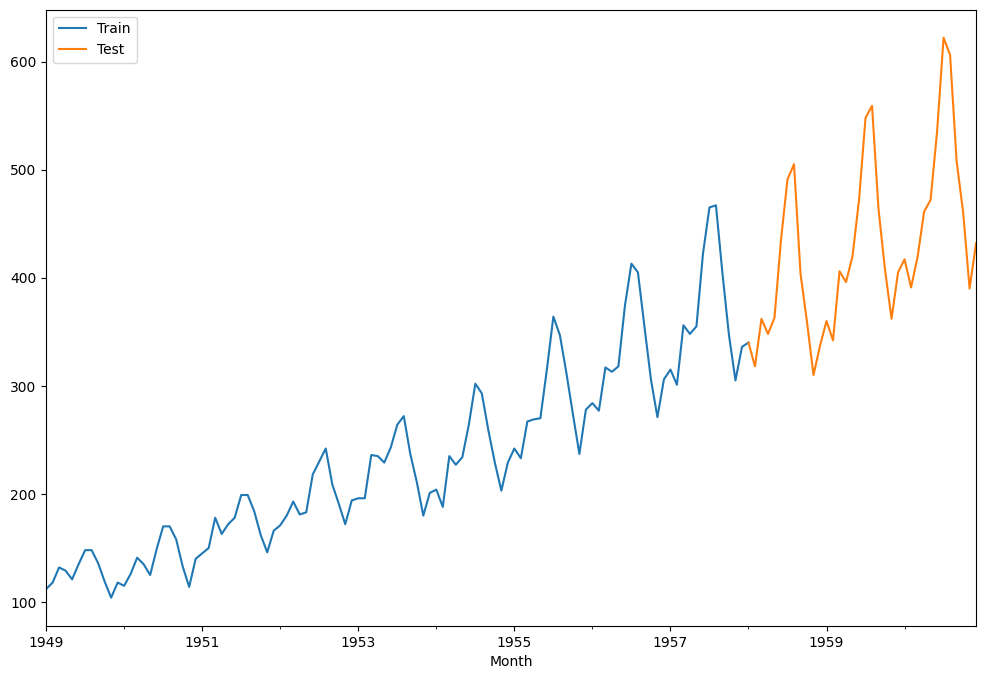

In [13]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
# test_predictions.plot()

<Axes: xlabel='Month'>

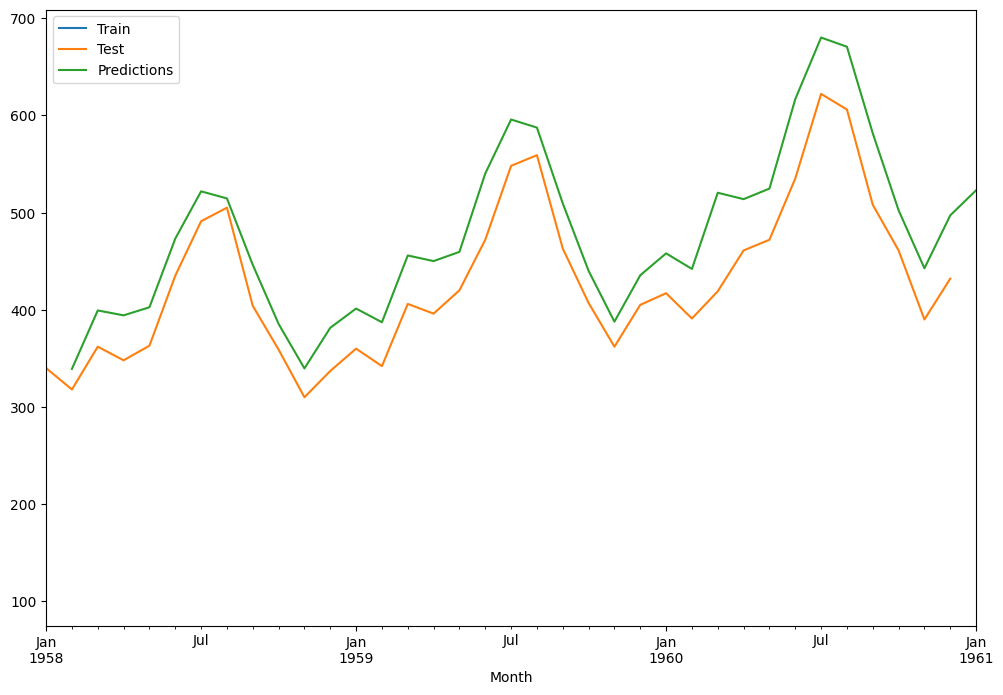

In [18]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predictions',xlim=['1958-01-01','1961-01-01'])